In [2]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

In [3]:
#@title Helper functions

from sklearn.utils import Bunch
from sklearn.datasets import load_iris

dataset = load_iris()
sample = [ 57, 122, 118,  53, 117,  81,  70, 142,  84,  16, 103,  82,  66, 31,  83]
test_sample = [89, 20, 72, 67, 12]

petal_length = np.take(dataset.data[:, 2], sample)
petal_width = np.take(dataset.data[:, 3], sample)
iris_data = Bunch(data=petal_length, target=petal_width)

test_petal_length = np.take(dataset.data[:, 2], test_sample)
test_petal_width = np.take(dataset.data[:, 3], test_sample)

def plot_iris_dataset(a=None, b=None, model=None, residuals=False, test=False, savefig=False, figname=None):
  if test:
    plt.scatter(iris_data.data, iris_data.target, alpha=0.2, zorder=0)
    plt.scatter(test_petal_length, test_petal_width, c='red', zorder=0)
  else:
    plt.scatter(iris_data.data, iris_data.target, zorder=0)

  x = np.linspace(0, 8, 100).reshape(-1, 1)
  if model:
    plt.plot(x, model.predict(x), c='orange', zorder=0)
  elif a is not None and b is not None:
    plt.plot(x, a * x + b, c='orange', zorder=0)


  if residuals:
    if test:
      X = test_petal_length.reshape(-1, 1)
      y = test_petal_width
    else:
      X = iris_data.data.reshape(-1, 1)
      y = iris_data.target
    if model:
      y_pred = model.predict(X)
    elif a is not None and b is not None:
      y_pred = a * X + b
    plt.vlines(X, y, y_pred, colors='red', zorder=1)

  plt.xlabel("petal length (cm)")
  plt.ylabel("petal width (cm)")
  plt.xlim([-0.25, 8.25])
  plt.ylim([-0.25, 2.75])

  if savefig:
    plt.savefig('{}.jpeg'.format(figname if figname else 'figure'), dpi=600)

  plt.show()

def plot_iris_dataset_with_line(a, b, residuals=False, test=False, **kwargs):
  plot_iris_dataset(a=a, b=b, residuals=residuals, test=test, **kwargs)

# These functions are needed for the 3D dataset
def predict_house_price(x1, x2, a):
    y = a[0]*x1 + a[1]*x2 + a[2]
    return y

import plotly.graph_objects as go

def plot_3d_data_samples(data, a=None, plane=False):
  x, y, z = data

  fig = go.Figure()

  fig.add_trace(go.Scatter3d(
          x=x, y=y, z=z, mode='markers'))

  if plane:
    xmin = np.amin(x)
    xmax = np.amax(x)
    ymin = np.amin(y)
    ymax = np.amax(y)

    x1 = np.linspace(xmin, xmax, 100)
    x2 = np.linspace(ymin, ymax, 100)

    X1, X2 = np.meshgrid(x1, x2)
    Y = predict_house_price(X1, X2, a)

    fig.add_trace(go.Surface(
        x=x1, y=x2, z=Y))

  fig.update_layout(scene = dict(
      xaxis_title="Location",
      yaxis_title="Size (sqm)",
      zaxis_title="Price (k)"),
      width=700,
      margin=dict(r=20, b=10, l=10, t=10)
  )
  fig.show()

def plot_3d_data_samples_with_fitted_plane(data, a):
  plot_3d_data_samples(data, a, plane=True)

# Simple linear model

In a linear model, we assume that the *labels* we want to predict can be obtained through a *linear transformation* of the *features*.

When we have only one feature, the linear model reduces to the equation of a line, which we are all familiar with:

$$y = ax + b$$

Here the feature is denoted by $x$, the label by $y$, and $(a, b)$ are the *parameters* of the model.

The goal of the *linear regression* method, then, is to obtain the coefficients $(a, b)$ that best model the data (our features and labels).

## The dataset

We will be using a subset of the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) with just 15 points, predicting the petal width from petal length of iris flowers.

Here is some code to load the dataset—we extract the petal widths into an array called `petal_width` and petal lengths into `petal_length`

In [4]:
from sklearn.utils import Bunch
from sklearn.datasets import load_iris

dataset = load_iris()
# A list of examples we want to select from the iris dataset for demonstration purposes.
sample = [ 57, 122, 118,  53, 117,  81,  70, 142,  84,  16, 103,  82,  66, 31,  83]

# np.take selects specific examples from the array representing the full dataset.
petal_length = np.take(dataset.data[:, 2], sample)
petal_width = np.take(dataset.data[:, 3], sample)
iris_data = Bunch(data=petal_length, target=petal_width)

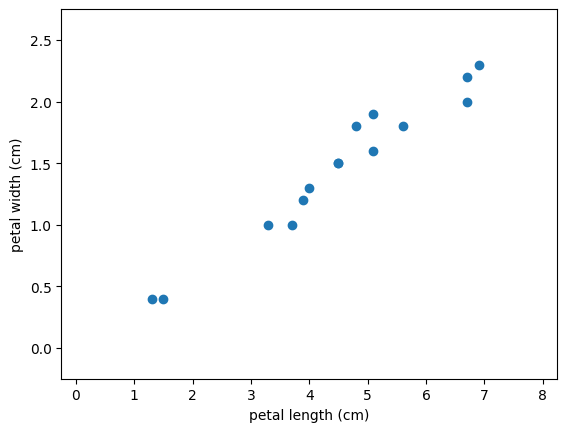

In [5]:
plot_iris_dataset()

## Fitting a simple linear model

Our model is of the form

$$y = ax + b$$

or, in our case of the iris dataset,

$$petal\_width = a \cdot petal\_length + b$$

for some unknown $a$ and $b$. Our goal will be to find the line (parameterised by $a$ and $b$) which fits our dataset the best.




## Experimenting with random line
Try out some lines using another magic plotting function, setting different values for `a` and `b`.



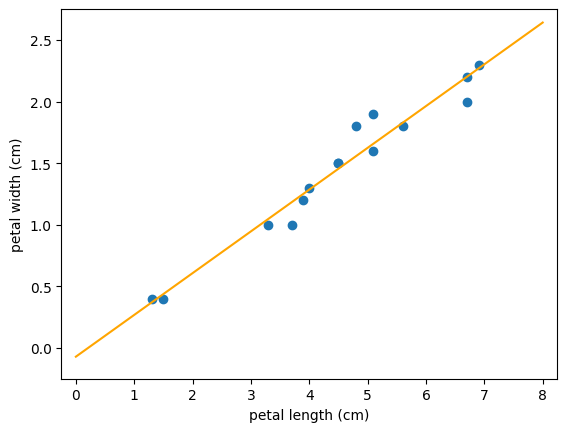

In [6]:
a = 0.339
b = -0.071
plot_iris_dataset_with_line(a, b)

## Quantifying the residuals

How could you tell whether one line you tried was better than another? You probably used some notion of "closeness" of the line to the data points. For example, the line

![](https://raw.githubusercontent.com/kamilest/oxwocs-girls-who-ml-2021/main/images/bad_line.jpeg)

probably looks worse than this other line below.

![](https://raw.githubusercontent.com/kamilest/oxwocs-girls-who-ml-2021/main/images/better_line.jpeg)

Can we quantify this error? The answer is yes, and we can do this by computing the *residuals*.

The *residual* is just the *difference* between the value predicted by the model, $\hat{y}_i$, and the ground truth value $y_i$ for some observation $i$. For the data points in the iris dataset, we can visualise the residuals (the differences between the petal widths predicted by the line and the petal widths in the dataset) as follows:






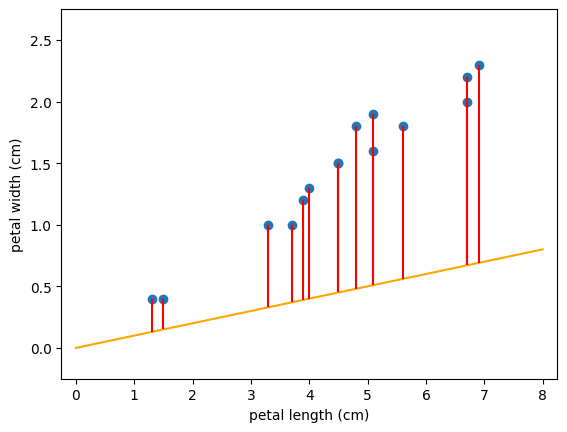

In [7]:
plot_iris_dataset_with_line(a=0.1, b=0, residuals=True)

where the residuals are shown with the red lines. You can see that the total length of the red lines above is larger than that in the following plot:

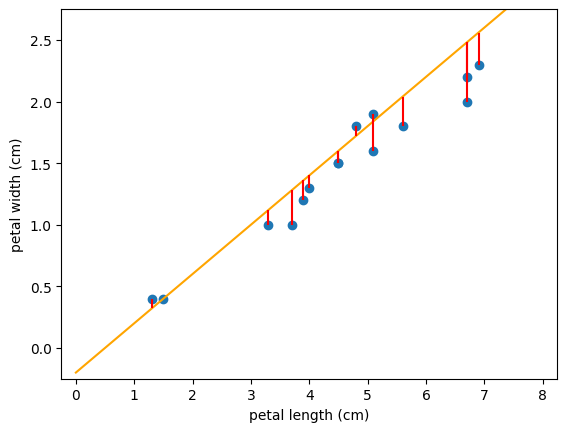

In [8]:
plot_iris_dataset_with_line(a=0.4, b=-0.2, residuals=True)

However, since we do not really care about whether the residual is above or below the line, and because we want  the penalty to scale faster for very large distances, we square the value of the residual:

$$ (\hat{y}_i - y_i)^2$$

To account for all the information in the dataset and not just the single point, we compute the average of the squared residuals for all points (assuming there are $N$ points in total, and again accounting for the fact that Python is 0-indexed):

$$ \frac{1}{N} \sum_{i=0}^{N-1} (\hat{y}_i - y_i)^2$$

which is, in fact, one of the most popular *loss functions*, or *performance measures*, in machine learning called the *mean squared error* (MSE). Our next task will be to compute it.

## Task 1: Compute the MSE

Recall that $\hat{y}_i$ is the value predicted by the model $\hat{y}_i = a x_i + b$, where $x_i$ in our case is the *petal length*, $y_i$ is the *petal width*.

The final expression for the mean squared error is therefore

$$ \frac{1}{N} \sum_{i=0}^{N-1} (a x_i + b - y_i)^2$$

* $\color{red}{\textbf{TO DO :}}$ Write a function to compute the mean squared error of a given line for the iris dataset.

*Hint:* With all $x_i$ stored in `x` and all $y_i$ stored in `y`, the $x_i$ and $y_i$ in the dataset can be accessed through `x[i]` and `y[i]` respectively.


In [9]:
def mean_squared_error(a, b, data):
  if isinstance(data, tuple):
    x, y = data
  else:
    x, y = data.data,data.target
  mse = 0
  # mse = None # TODO: write some code here
  for i in range(len(x)):
    y_pred = a*x[i] + b
    error_i = y_pred - y[i]
    mse += error_i**2
  ###
  ###
  return mse/len(x)

In [10]:

mean_squared_error(a, b, iris_data)


np.float64(0.013897802666666664)

# Computing the analytic solution

The best coefficients $a$ and $b$ that minimise the mean squared error can be found analytically, using a bit of calculus.

In particular, we set the *gradient* of the MSE loss function to 0 in order to obtain the *least squares estimate* for $a$ and $b$. For MSE denoted by $L(a, b)$, setting

$$ \dfrac{\partial L }{\partial a} := 0 $$

and

$$ \dfrac{\partial L }{\partial b} := 0 $$

we obtain the least squares estimate

$$ a = \dfrac{\sum_i(x_i - \bar x)(y_i - \bar y)}{\sum_i(x_i - \bar x)^2}$$
&nbsp;
$$ b = \bar y - a \bar x$$

where $\bar x$ is the mean value of $[x_0, \dots, x_{N-1}]$ and so on.



## Task 2: Compute the least squares estimate

Use the above expressions for $a$ and $b$ that minimise the MSE to get the least squares coefficients for the iris dataset.
* *Hint*: you might find it helpful to first compute the sum terms separately, e.g. compute `sum_xy`, `mean_x`, `mean_y` and use these variables in the expressions for `a` and `b`.

Plot the resulting line using the magic function `plot_iris_dataset_with_line(a, b)` (and the residuals if you like).
* How does this line fit the data?

$\color{red}{\textbf{TO DO :}}$ Compute the MSE for the coefficients you obtained.


In [11]:
def iris_least_squares_estimate(data):
  x, y = data.data,data.target
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  sum_1 = 0
  sum_2 = 0
  for i in range(len(x)):
    sum_1 += ( (x[i] - x_mean) * (y[i] - y_mean))
    sum_2 += (x[i] - x_mean)**2
  # TODO: compute the values for the expressions for a and b in the previous
  # section.
  a = sum_1 / sum_2
  b = y_mean - a * x_mean
  ###
  ###
  ###
  return a, b

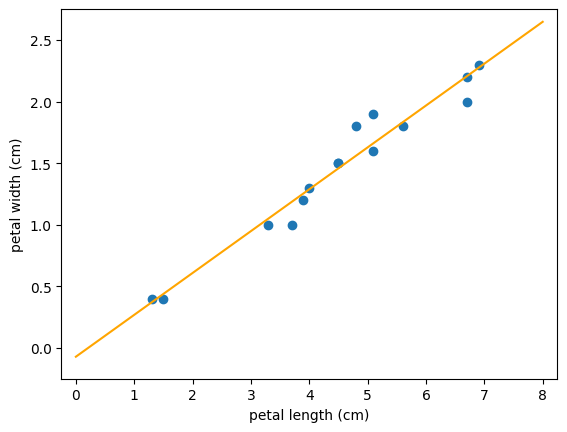

In [12]:
# TODO: Plot the resulting line
a,b = iris_least_squares_estimate(iris_data)
plot_iris_dataset_with_line(a,b)

In [13]:
# TODO: Computing the MSE of the resulting line
mse = mean_squared_error(a,b,iris_data)
print("mse = ",mse)

mse =  0.01388567688940041


## Task 3: Predict petal widths for new flowers

In the previous sections, we found the coefficients `a` and `b` that best describe the dataset of our 15 observations. However, the main reason we do this estimation is so that we can predict the labels for *new*, unseen observations.

To estimate how well our model *generalises* to unseen data, we normally use a *test* dataset. Let's first plot some test values in red, with the original values (our *training dataset*) in lighter shade:

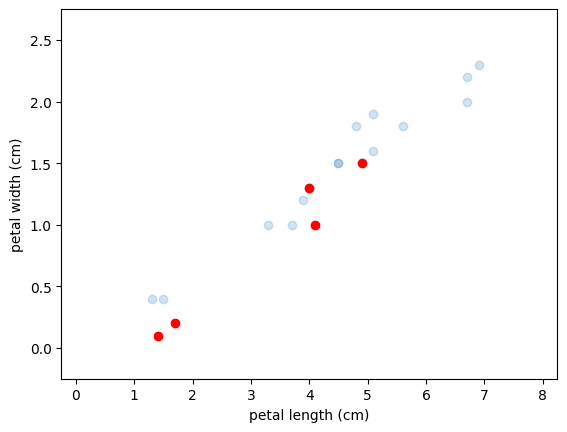

In [14]:
# Get indices for five test points from the full dataset.
test_sample = [89, 20, 72, 67, 12]

test_petal_length = np.take(dataset.data[:, 2], test_sample)
test_petal_width = np.take(dataset.data[:, 3], test_sample)

plot_iris_dataset(test=True)

### Plot the estimated line

$\color{red}{\textbf{TO DO :}}$ Use one of the magic plotting functions to plot the regression line (which you found the parameters for using the least squares estimate).

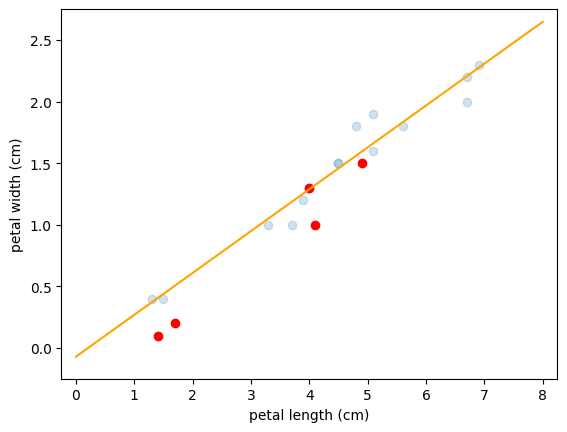

In [15]:
# TODO: call a function to plot the regression line for the test dataset.
###
plot_iris_dataset_with_line(a,b,test=True)
###

You may notice that the line does not exactly fit the new data points. We can print the labels predicted by the model and compare them to the ground truth labels, as well as compute the MSE for the test dataset.

### Predict the labels for test data

$\color{red}{\textbf{TO DO :}}$ Predict the labels for the test data points. Most of the code has been filled out for you—you only need to compute the predictions using the `a` and `b` you estimated earlier.

*Hint:* Recall that `y_predicted`, or $\hat{y}_i$, is computed as

$$ \hat{y}_i = ax_i + b$$

In [16]:
def predict_petal_widths(a, b):
  for (x, y_true) in zip(test_petal_length, test_petal_width):
    ### # TODO: compute the prediction
    ### Assign the prediction to variable y_predicted
    y_predicted = a*x +b

    print('Ground truth: {}\tPrediction: {}'.format(y_true, y_predicted))
predict_petal_widths(a,b)

Ground truth: 1.3	Prediction: 1.2878410398754319
Ground truth: 0.2	Prediction: 0.5063299708889042
Ground truth: 1.5	Prediction: 1.5936497190440733
Ground truth: 1.0	Prediction: 1.3218197820052808
Ground truth: 0.1	Prediction: 0.4043937444993571


### Compute test MSE

We can also compute the test mean squared error. Since the MSE function was conveniently dependent on the `data` argument, we only need to pass the test points instead of the training points to get the test MSE.

$\color{red}{\textbf{TO DO :}}$

*Is the test MSE larger than the MSE you computed for the training data?*

In [17]:
data = (test_petal_length, test_petal_width)
### # TODO: pass the relevant arguments here.
test_mse = mean_squared_error(a,b,data)
train_mse = mean_squared_error(a,b,iris_data)
print("test mse = ",test_mse)
print("train mse = ",train_mse)

test mse =  0.05979593700668158
train mse =  0.01388567688940041


# Higher dimensional input features

The task is to fit a linear regression model to a dataset with
higher dimensional input features. We choose to model the housing price as a fucntion of the property's location and its size, using a synthetic dataset.

In [18]:
# generate the housing price dataset
location = np.array([1, 1, 2, 2, 3, 3, 4, 4, 4, 5])
size = np.array([50, 90, 30, 40, 36, 45, 40, 78, 108, 200])
price = np.array([300, 500, 300, 350, 450, 500, 400, 600, 800, 400])

data_3d = (location, size, price)

plot_3d_data_samples(data_3d)

## Task 4: Fit Linear Regression to higher dimensional feature

### Create the big data matrix X

Now *can you create the data matrix that stores all the input features?*

Recall that

$$\mathbf X = \begin{bmatrix} \mathbf{x}_1^\top \\ \mathbf{x}_2^\top \\ \vdots \\ \mathbf{x}_{N}^\top \end{bmatrix}, \;\;\text{where}\;\; \mathbf{x}_i=\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d\end{bmatrix}$$

Here we index the observations from $1$ to $N$ again, but remember that in code they would range from `0` to `N-1`.

*Hint:* for vector and matrix operations, you can use a popular Python scientific computing library called NumPy:
1. First, reshape each of the feature arrays (in this case `location` and `size`) into *column* vectors of shape `(N, 1)`.* For the NumPy array `x`, this can be done using `x.reshape()` function, passing your desired shape as the argument. You might also notice that `location` and `size` are NumPy arrays already, so no need to explicitly transform them into the NumPy format, just reshaping.
2. Recall that we also needed to append ones to every feature vector (i.e. $\mathbf x_i = [x_1, \dots, x_d, 1]^\top$) to avoid explicitly modelling the bias $b$. Alternatively, we can create another feature consisting of just ones using the `np.ones(shape)` function, where `shape` should be the same as the shape of your other column feature vectors.
3. Concatenate all the reshaped feature vectors (`location`, `size`, and the vector of `ones` that you created) into a matrix $\mathbf X$ using `np.concatenate((reshaped_location, reshaped_size, ones), axis=1)` function.
4. Remember that `y` is the *column* vector of labels: $$ \mathbf y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_{N}\end{bmatrix}$$ In our case, the labels are stored in the numpy array `price`. Don't forget, as before, to reshape it into a column!

$\color{red}{\textbf{TO DO :}}$

In [55]:
N = len(location) # get the number of observations
location = location.reshape((N,1))
size = size.reshape((N,1))
ones = np.ones((N,1))

# TODO: create the X matrix
###
X = np.concatenate((location,size,ones),axis=1)
print(X)
# TODO: create the y vector
y = price.reshape((N,1))
###

[[  1.  50.   1.]
 [  1.  90.   1.]
 [  2.  30.   1.]
 [  2.  40.   1.]
 [  3.  36.   1.]
 [  3.  45.   1.]
 [  4.  40.   1.]
 [  4.  78.   1.]
 [  4. 108.   1.]
 [  5. 200.   1.]]


### Aside on row and column vectors

Take a look at the entire matrix $\mathbf X$:

$$ \mathbf X = \begin{bmatrix}
x_{1}^{(1)} & x_{2}^{(1)} & \dots & x_{d}^{(1)} & 1 \\
x_{1}^{(2)} & x_{2}^{(2)} & \dots & x_{d}^{(2)} & 1 \\
\vdots & \vdots & \vdots  & \vdots & \vdots \\
x_{1}^{(N)} & x_{2}^{(N)} & \dots & x_{d}^{(N)} & 1 \\
\end{bmatrix}
$$

In this case $x_i^{(m)}$ means the $i$-th feature of the $m$-th observation in the dataset. Again note that I index the examples starting from 1 because it is easier to read, but in Python code they will all range from `0` to `N-1` for the observations, and from `0` to `d-1` for the features.

Taking a look at the first row of the matrix,
$$[x_{1}^{(1)}, x_{2}^{(1)}, \dots, x_{d}^{(1)}, 1]$$

you can see that it contains all the $d$ features (as well as the constant term $1$) for the first observation (superscript $\phantom\cdot^{(1)}$). But because the vectors are normally represented as columns (and the $i$-th observation $\mathbf x^{(i)}$ is interpreted as a column vector), to put the column vector $\mathbf x^{(i)}$ into the matrix $\mathbf X$ as we just did, we need to transpose it into a row $\mathbf x^{(i)\top}$.

Similarly, by taking a look at the first column

$$\begin{bmatrix}
x_1^{(1)} \\
x_1^{(2)} \\
\vdots \\
x_1^{(N)} \\
\end{bmatrix}
$$

you can see that it contains the values for the first feature (subscript $\cdot_1$) for all examples in the dataset (superscripts $\phantom\cdot^{(1)}$, ..., $\phantom\cdot^{(N)}$).

Since our data is grouped by features (arrays `location` and `size`) and not by observations, we construct the big matrix `X` by combining the *columns* representing the different features, rather than the rows representing the different observations. By taking a look at the last column of $\mathbf X$ you may also see why we needed to create a column vector of `ones`.


### Compute the least squares estimate **a**

Now *can you compute the least squares estimate $\mathbf{a}$?*

Recall $$ \mathbf{a} = (\mathbf X^\top \mathbf X)^{-1} \mathbf X^\top \mathbf y $$

*Hints*: For vector operations, use the following functions from the NumPy library.

**Option 1**: use
* `np.linalg.inv` for matrix inversion
* `np.matmul` for matrix multiplication
* `np.transpose` for matrix transpose

and compute $\mathbf a$ directly following the expression above.

**Option 2**: observe that we can rewrite the above expression as

$$ (\mathbf X^\top \mathbf X) \mathbf a = \mathbf X^\top \mathbf y. $$

Overloading the notation a bit, we can solve a generic system of equations `Ax = b` (where `x` is the unknown) using the function `np.linalg.solve(A, b)`. What are `A`, `x` and `b` in the expression $ (\mathbf X^\top \mathbf X) \mathbf a = \mathbf X^\top \mathbf y $?

As always, ask your demonstrator if unsure!

$\color{red}{\textbf{TO DO :}}$ Compute Least Squares estimate



In [56]:
# TODO: calculate the coefficient vector `a` using your preferred method.
print(X.T @ X)
a = np.linalg.inv(X.T @ X) @ X.T @ y
print(a)
# a = np.linalg.solve(np.matmul(X.T,X),X.T @ y)
###

[[1.0100e+02 2.4270e+03 2.9000e+01]
 [2.4270e+03 7.5769e+04 7.1700e+02]
 [2.9000e+01 7.1700e+02 1.0000e+01]]
[[4.26498433e+01]
 [2.56593753e-01]
 [3.17917682e+02]]


Now plot the plane using the estimated coefficient $\mathbf{a}$.

*Is this plane a good fit to our data?*

In [57]:
plot_3d_data_samples_with_fitted_plane(data_3d, a)